In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My Drive/Emotion Recogition/code/python_files

/content/drive/My Drive/Emotion Recogition/code/python_files


In [0]:
import numpy as np
import os
import sys
import pandas as pd
import wave
import librosa
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
import keras
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM, Input, Flatten,Dropout,GlobalAveragePooling2D,MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from scipy import signal
import matplotlib.pyplot as plot
from helper import *
from features import *
from sklearn.preprocessing import LabelEncoder
from keras import backend as K

Using TensorFlow backend.


In [0]:

code_path = os.path.dirname(os.path.realpath(os.getcwd()))
emotions_used = np.array(['ang', 'exc', 'neu', 'sad'])
data_path = code_path + "/../data/sessions/"
sessions = ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']
framerate = 16000

In [0]:
import pickle
with open(code_path + '/../data/'+'data_collected.pickle', 'rb') as handle:
    data2 = pickle.load(handle)

In [0]:
!pip install python_speech_features  

In [0]:
from python_speech_features import mfcc
from python_speech_features import logfbank
from sklearn.preprocessing import scale
import scipy.io.wavfile as wav

In [0]:
X_train = []# speaker INdependent data creation
X_test = []
Y_train = []
Y_test = []
fs = 16e3
counter = 0
counter1 = 0
for ses_mod in data2:
    if 'impro' in ses_mod['id'] and ses_mod['emotion'] in emotions_used:
        fbank_feat = logfbank(ses_mod['signal'],nfilt=40)
        Sxx = np.transpose(fbank_feat)
        Sxx = pad_sequence_into_array(Sxx,maxlen=600,value=0)
        Sxx = np.transpose(Sxx)
        Sxx = scale(Sxx)
        Sxx = np.transpose(Sxx)
       
        
        if ses_mod['id'][:5]=="Ses05":
            counter+=1
            X_test.append(Sxx)
            Y_test.append(ses_mod['emotion'])
        else:
            counter1+=1
            X_train.append(Sxx)
            Y_train.append(ses_mod['emotion'])
        
print(counter)
print(counter1)

X_test = np.array(X_test)
X_train = np.array(X_train)
print(X_train.shape)
print(X_test.shape)

625
2034
(2034, 40, 300)
(625, 40, 300)


In [1]:
# speaker dependent data creation
X_train = []
Y_train = []
fs = 16e3
counter1 = 0
for ses_mod in data2:
    if 'impro' in ses_mod['id'] and ses_mod['emotion'] in emotions_used:
        fbank_feat = logfbank(ses_mod['signal'],nfilt=40)
        Sxx = np.transpose(fbank_feat)
        Sxx = pad_sequence_into_array(Sxx,maxlen=300,value=0)
        Sxx = scale(Sxx)
        counter1+=1
        X_train.append(Sxx)
        Y_train.append(ses_mod['emotion'])
        
print(counter)
print(counter1)
X_train = np.array(X_train)
print(X_train.shape)


NameError: ignored

In [0]:
X_train = X_train.reshape(-1,40,300,1)
X_test = X_test.reshape(-1,40,300,1)

In [0]:
X_train = []
X_test = []
Y_train = []
Y_test = []
fs = 16e3
counter = 0
counter1 = 0
for ses_mod in data2:
    if 'impro' in ses_mod['id'] and ses_mod['emotion'] in emotions_used:
        f, t, Sxx = signal.spectrogram(ses_mod['signal'], fs, nperseg=400,noverlap=200)
        Sxx = pad_sequence_into_array(Sxx,maxlen=300,value=0)
        
        if ses_mod['id'][:5]=="Ses05":
            counter+=1
            X_test.append(Sxx[0:200,:])
            Y_test.append(ses_mod['emotion'])
        else:
            counter1+=1
            X_train.append(Sxx[0:200,:])
            Y_train.append(ses_mod['emotion'])
        
print(counter)
print(counter1)

X_test = np.array(X_test)
X_train = np.array(X_train)
print(X_train.shape)
print(X_test.shape)

In [0]:
X_train = X_train.reshape(-1,200,300,1)
X_test = X_test.reshape(-1,200,300,1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_train, Y_train, test_size =0.2, random_state=42)

In [0]:
def noise_mix(y,sig): # noise mixing code
  n=y[:len(sig)]
  n=n-np.mean(n)
  n=n/np.sqrt(np.var(n))
  vs=np.var(sig)
  vn = vs/(np.power(10,(5/10)))#SNR level, here 8dB
  n=n*np.sqrt(vn)
  nsp=sig+n
  nsp=nsp/(max(abs(nsp)*1.01))
  return nsp
  


In [0]:
y  = pd.get_dummies(Y_train+Y_test)
y_train = y[0:len(Y_train)]
y_test = y[len(Y_train):]
y_train = np.array(y_train)
y_test = np.array(y_test)

In [2]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization,Masking
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical

Using TensorFlow backend.


ImportError: ignored

In [0]:
batch_size = 64
epochs = 50
input_i = Input(shape=(40,300,1))
num_classes = 4

In [0]:
def encoder(input_i):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    in_layer = Masking(mask_value=0)(in_layer)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_i) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    #conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    #conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    #conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    #conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    #conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    #conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    #conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    #conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    #conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    #conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    #conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    #conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    #conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    #conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [0]:
autoencoder_model = Model(input_i,decoder(encoder(input_i)))

autoencoder_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 40, 300, 1)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 40, 300, 32)       320       
_________________________________________________________________
batch_normalization_27 (Batc (None, 40, 300, 32)       128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 150, 32)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 20, 150, 64)       18496     
_________________________________________________________________
batch_normalization_28 (Batc (None, 20, 150, 64)       256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 75, 64)        0         
__________

In [0]:
autoencoder_model.compile(loss='mean_squared_error', optimizer='Adam')
early_stopping_monitor = EarlyStopping( monitor='val_loss',patience=20,verbose=1)
m_check = keras.callbacks.ModelCheckpoint(filepath = './cnn_encoder.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1 )
autoencoder_train = autoencoder_model.fit(X_train, X_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, X_test),shuffle = True,callbacks=[m_check,early_stopping_monitor])

Train on 2034 samples, validate on 625 samples
Epoch 1/50
2034/2034 [==============================] - 11s 6ms/step - loss: 0.6819 - val_loss: 0.5860

Epoch 00001: val_loss improved from inf to 0.58603, saving model to ./cnn_encoder.h5
Epoch 2/50
2034/2034 [==============================] - 8s 4ms/step - loss: 0.6165 - val_loss: 0.5697

Epoch 00002: val_loss improved from 0.58603 to 0.56972, saving model to ./cnn_encoder.h5
Epoch 3/50
2034/2034 [==============================] - 8s 4ms/step - loss: 0.6036 - val_loss: 0.5658

Epoch 00003: val_loss improved from 0.56972 to 0.56583, saving model to ./cnn_encoder.h5
Epoch 4/50
2034/2034 [==============================] - 8s 4ms/step - loss: 0.5953 - val_loss: 0.5583

Epoch 00004: val_loss improved from 0.56583 to 0.55827, saving model to ./cnn_encoder.h5
Epoch 5/50
2034/2034 [==============================] - 8s 4ms/step - loss: 0.5895 - val_loss: 0.5522

Epoch 00005: val_loss improved from 0.55827 to 0.55219, saving model to ./cnn_encoder

In [0]:
model = load_model('cnn_encoder.h5')


In [0]:
from keras.models import Model

layer_name = 'lstm_9'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
output_train = intermediate_layer_model.predict(X_train)
output_test =  intermediate_layer_model.predict(X_test)

In [0]:
print(output_train.shape)
print(output_test.shape)
print(y_train.shape)

(2034, 8)
(625, 8)
(2034, 4)


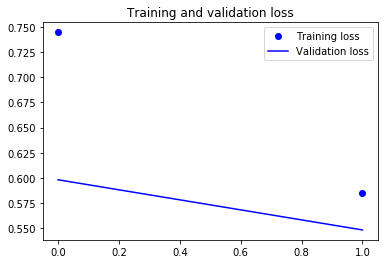

In [0]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(2)
plot.figure()
plot.plot(epochs, loss, 'bo', label='Training loss')
plot.plot(epochs, val_loss, 'b', label='Validation loss')
plot.title('Training and validation loss')
plot.legend()
plot.show()

In [0]:
autoencoder_model.save_weights('autoencoder.h5')

In [0]:
def encoder(input_i):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_i) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    #conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    #conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    #conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    #conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    #conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    #conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    #conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    #conv4 = BatchNormalization()(conv4)
    return conv4

In [0]:
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(64, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out


In [0]:
encode = encoder(input_i)
full_model = Model(input_i,fc(encode))


In [0]:
for l1,l2 in zip(full_model.layers[:11],autoencoder_model.layers[0:11]):
    l1.set_weights(l2.get_weights())


In [0]:
autoencoder_model.get_weights()[0][1]

array([[[-0.03381157, -0.01543381,  0.13758959, -0.059755  ,
         -0.04564874,  0.06945912, -0.05326904, -0.06326246,
          0.12757613,  0.0448797 , -0.02894594, -0.0928357 ,
          0.04501045,  0.08550222, -0.02697727,  0.19930366,
         -0.00052803, -0.1428507 ,  0.08509213, -0.0152761 ,
          0.1400934 ,  0.08349174,  0.02838436, -0.04363441,
         -0.05313318, -0.06314511, -0.10586615, -0.07677697,
         -0.03427925,  0.06861374, -0.0773773 ,  0.17546473]],

       [[-0.10136758, -0.11091016,  0.16236265, -0.0157314 ,
          0.00623128,  0.07726742, -0.11009747, -0.03052339,
          0.10430571,  0.03728704, -0.11145773, -0.10389713,
         -0.07812285, -0.03966625,  0.12041695,  0.2075295 ,
          0.09912615, -0.0891383 ,  0.09436707, -0.04796574,
          0.03532767,  0.08839517,  0.0270032 , -0.01433109,
          0.05892213, -0.09213899, -0.09767716,  0.13671322,
          0.04478288,  0.40107328, -0.12421656,  0.13670164]],

       [[-0.076878

In [0]:
full_model.get_weights()[0][1]

array([[[-0.03381157, -0.01543381,  0.13758959, -0.059755  ,
         -0.04564874,  0.06945912, -0.05326904, -0.06326246,
          0.12757613,  0.0448797 , -0.02894594, -0.0928357 ,
          0.04501045,  0.08550222, -0.02697727,  0.19930366,
         -0.00052803, -0.1428507 ,  0.08509213, -0.0152761 ,
          0.1400934 ,  0.08349174,  0.02838436, -0.04363441,
         -0.05313318, -0.06314511, -0.10586615, -0.07677697,
         -0.03427925,  0.06861374, -0.0773773 ,  0.17546473]],

       [[-0.10136758, -0.11091016,  0.16236265, -0.0157314 ,
          0.00623128,  0.07726742, -0.11009747, -0.03052339,
          0.10430571,  0.03728704, -0.11145773, -0.10389713,
         -0.07812285, -0.03966625,  0.12041695,  0.2075295 ,
          0.09912615, -0.0891383 ,  0.09436707, -0.04796574,
          0.03532767,  0.08839517,  0.0270032 , -0.01433109,
          0.05892213, -0.09213899, -0.09767716,  0.13671322,
          0.04478288,  0.40107328, -0.12421656,  0.13670164]],

       [[-0.076878

In [0]:
for layer in full_model.layers[0:11]:
    layer.trainable = False

In [0]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
full_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 40, 300, 1)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 40, 300, 32)       320       
_________________________________________________________________
batch_normalization_42 (Batc (None, 40, 300, 32)       128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 20, 150, 32)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 20, 150, 64)       18496     
_________________________________________________________________
batch_normalization_43 (Batc (None, 20, 150, 64)       256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 75, 64)        0         
__________

In [0]:
Y_label = ( [np.where(r==1)[0][0] for r in y_train] )
early_stopping_monitor = EarlyStopping( monitor='val_loss',patience=20,verbose=1)
m_check = keras.callbacks.ModelCheckpoint(filepath = './lstm_encoder.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1 )
classify_train = full_model.fit(X_train, y_train, batch_size=64,epochs=50,verbose=1,validation_data=(X_test, y_test),shuffle = True,callbacks=[m_check,early_stopping_monitor],class_weight = class_weight.compute_class_weight("balanced", np.unique(Y_label), Y_label))

Train on 2034 samples, validate on 625 samples
Epoch 1/50
2034/2034 [==============================] - 6s 3ms/step - loss: 9.4774 - acc: 0.3918 - val_loss: 8.7167 - val_acc: 0.4592

Epoch 00001: val_loss improved from inf to 8.71667, saving model to ./lstm_encoder.h5
Epoch 2/50
2034/2034 [==============================] - 3s 1ms/step - loss: 9.6835 - acc: 0.3992 - val_loss: 8.7167 - val_acc: 0.4592

Epoch 00002: val_loss did not improve from 8.71667
Epoch 3/50
2034/2034 [==============================] - 3s 1ms/step - loss: 9.6835 - acc: 0.3992 - val_loss: 8.7167 - val_acc: 0.4592

Epoch 00003: val_loss did not improve from 8.71667
Epoch 4/50
2034/2034 [==============================] - 3s 1ms/step - loss: 9.6835 - acc: 0.3992 - val_loss: 8.7167 - val_acc: 0.4592

Epoch 00004: val_loss did not improve from 8.71667
Epoch 5/50
2034/2034 [==============================] - 3s 1ms/step - loss: 9.6835 - acc: 0.3992 - val_loss: 8.7167 - val_acc: 0.4592

Epoch 00005: val_loss did not improve f

In [0]:
full_model.save_weights('autoencoder_classification.h5')

In [0]:
for layer in full_model.layers[0:11]:
    layer.trainable = True

In [0]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [0]:
Y_label = ( [np.where(r==1)[0][0] for r in y_train] )
early_stopping_monitor = EarlyStopping( monitor='val_loss',patience=20,verbose=1)
m_check = keras.callbacks.ModelCheckpoint(filepath = './lstm_encoder.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1 )
classify_train = full_model.fit(X_train, y_train, batch_size=64,epochs=50,verbose=1,validation_data=(X_test, y_test),shuffle = True,callbacks=[m_check,early_stopping_monitor],class_weight = class_weight.compute_class_weight("balanced", np.unique(Y_label), Y_label))

Train on 2034 samples, validate on 625 samples
Epoch 1/50
2034/2034 [==============================] - 9s 4ms/step - loss: 9.6835 - acc: 0.3992 - val_loss: 8.7167 - val_acc: 0.4592

Epoch 00001: val_loss improved from inf to 8.71667, saving model to ./lstm_encoder.h5
Epoch 2/50
2034/2034 [==============================] - 5s 2ms/step - loss: 9.6835 - acc: 0.3992 - val_loss: 8.7167 - val_acc: 0.4592

Epoch 00002: val_loss did not improve from 8.71667
Epoch 3/50
2034/2034 [==============================] - 5s 2ms/step - loss: 9.6835 - acc: 0.3992 - val_loss: 8.7167 - val_acc: 0.4592

Epoch 00003: val_loss did not improve from 8.71667
Epoch 4/50
2034/2034 [==============================] - 5s 2ms/step - loss: 9.6835 - acc: 0.3992 - val_loss: 8.7167 - val_acc: 0.4592

Epoch 00004: val_loss did not improve from 8.71667
Epoch 5/50
2034/2034 [==============================] - 5s 2ms/step - loss: 9.6835 - acc: 0.3992 - val_loss: 8.7167 - val_acc: 0.4592

Epoch 00005: val_loss did not improve f

In [0]:
full_model.save_weights('classification_complete.h5')

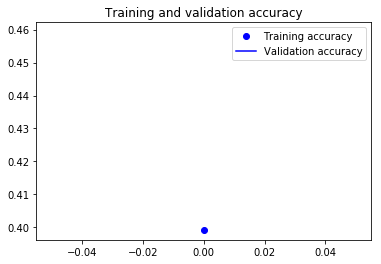

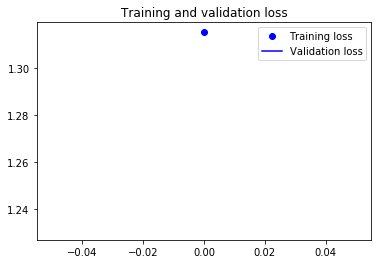

In [0]:
accuracy = classify_train.history['acc']
val_accuracy = classify_train.history['val_acc']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plot.plot(epochs, accuracy, 'bo', label='Training accuracy')
plot.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plot.title('Training and validation accuracy')
plot.legend()
plot.figure()
plot.plot(epochs, loss, 'bo', label='Training loss')
plot.plot(epochs, val_loss, 'b', label='Validation loss')
plot.title('Training and validation loss')
plot.legend()
plot.show()

In [0]:
X_test = [] #noisyy_testdata
fs = 16e3
counter = 0
counter1 = 0
y, sr =librosa.load('SIGNAL003-20kHz.wav')
y = librosa.resample(y, sr, 16000)
for ses_mod in data2:
    if 'impro' in ses_mod['id'] and ses_mod['emotion'] in emotions_used:
        if ses_mod['id'][:5]=="Ses05":
            noise = noise_mix(y,ses_mod['signal'])
            fbank_feat = logfbank(noise,nfilt=40)
            Sxx = np.transpose(fbank_feat)
            Sxx = pad_sequence_into_array(Sxx,maxlen=300,value=0)
            Sxx = scale(Sxx)
            Sxx = np.transpose(Sxx)
            counter+=1
            X_test.append(Sxx)
            
      
print(counter)

X_test = np.array(X_test)
print(X_test.shape)

NameError: ignored

In [0]:
from sklearn.metrics import classification_report, accuracy_score

In [0]:
for i in range(len(y_pred)):
  for j in range(len(y_pred[i])) :
    if y_pred[i][j]==max(y_pred[i]) :
      y_pred[i][j] = 1
    else:
      y_pred[i][j]=0

In [0]:
print(y_pred)

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.45      0.39        31
           1       0.65      0.48      0.55       174
           2       0.65      0.78      0.71       287
           3       0.77      0.64      0.70       133

   micro avg       0.65      0.65      0.65       625
   macro avg       0.60      0.59      0.59       625
weighted avg       0.66      0.65      0.65       625
 samples avg       0.65      0.65      0.65       625



In [0]:
accuracy_score(y_pred, y_test)

0.6512

In [0]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(Y_train)
y_test = labelencoder.transform(Y_test)

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [0]:
xg_model = XGBClassifier(n_estimators=100,learning_rate=0.2,max_depth=7,objective = 'multi:softmax',
                       num_class=4,n_jobs=-1)

In [0]:
xg_model.fit(output_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, num_class=4, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [0]:
plot_importance(xg_model)
plt.show()

In [0]:
thresholds = np.sort(xg_model.feature_importances_)

In [0]:
# select features using threshold
selection = SelectFromModel(xg_model, threshold=0.005, prefit=True)
X_train = selection.transform(output_train)
X_test = selection.transform(output_test)

In [0]:
xg_model1 = XGBClassifier(n_estimators=100,learning_rate=0.2,max_depth=7,objective = 'multi:softmax',
                       num_class=4,n_jobs=-1)

In [0]:
xg_model1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, num_class=4, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [0]:
y_pred = xg_model1.predict(X_test)

In [0]:
X_train.shape

(2034, 114)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.26      0.22        31
           1       0.64      0.44      0.52       174
           2       0.63      0.69      0.66       287
           3       0.64      0.71      0.67       133

   micro avg       0.60      0.60      0.60       625
   macro avg       0.53      0.52      0.52       625
weighted avg       0.61      0.60      0.60       625



In [0]:
y_pred = xg_model.predict(output_test)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.23      0.29      0.26        31
           1       0.62      0.44      0.51       174
           2       0.63      0.68      0.65       287
           3       0.63      0.72      0.67       133

   micro avg       0.60      0.60      0.60       625
   macro avg       0.53      0.53      0.52       625
weighted avg       0.61      0.60      0.60       625



In [0]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0,n_jobs=-1)
#classifier.fit(output_train, y_train)

In [0]:
y_pred = classifier.predict(output_test)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.24      0.26      0.25        31
           1       0.63      0.45      0.52       174
           2       0.65      0.72      0.68       287
           3       0.67      0.74      0.70       133

   micro avg       0.63      0.63      0.63       625
   macro avg       0.55      0.54      0.54       625
weighted avg       0.63      0.63      0.62       625



In [0]:
from mlxtend.evaluate import confusion_matrix
m = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=False)
print(m)

In [0]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 40,None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [80,100,150,400]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(output_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


In [0]:
best_parameters

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 80}

In [0]:
best_accuracy

0.6647000983284169

In [0]:
classifier = RandomForestClassifier(n_estimators = 80, bootstrap=True,criterion = 'entropy', max_depth=20,max_features='auto',n_jobs=-1)
classifier.fit(output_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred = classifier.predict(output_test)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.24      0.26      0.25        31
           1       0.64      0.43      0.51       174
           2       0.64      0.73      0.68       287
           3       0.66      0.73      0.70       133

   micro avg       0.62      0.62      0.62       625
   macro avg       0.55      0.54      0.53       625
weighted avg       0.62      0.62      0.62       625



In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(output_train)
X_test_scaled = sc.transform(output_test)

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
#classifier.fit(X_train_scaled, y_train)

In [0]:
y_pred = classifier.predict(X_test_scaled)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.30      0.23      0.26        31
           1       0.65      0.41      0.50       174
           2       0.62      0.76      0.69       287
           3       0.67      0.72      0.70       133

   micro avg       0.63      0.63      0.63       625
   macro avg       0.56      0.53      0.54       625
weighted avg       0.62      0.63      0.61       625



In [0]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_scaled, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
best_parameters

{'C': 1, 'kernel': 'linear'}

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C=1)
classifier.fit(X_train_scaled, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = classifier.predict(X_test_scaled)

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.42      0.40        31
           1       0.74      0.36      0.49       174
           2       0.61      0.78      0.69       287
           3       0.65      0.70      0.67       133

   micro avg       0.63      0.63      0.63       625
   macro avg       0.60      0.56      0.56       625
weighted avg       0.65      0.63      0.61       625



In [0]:
import pickle
with open(filename, ‘wb’) as f:
    pickle.dump(y_train, f)

SyntaxError: ignored

In [0]:
def lstm_model():
    model = Sequential()
    model.add(LSTM(256, return_sequences=True, input_shape=(300, 40)))
    model.add(LSTM(256, return_sequences=False))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(4))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [0]:
model = lstm_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 300, 256)          304128    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 2052      
_________________________________________________________________
activation_4 (Activation)    (None, 4)                 0         
Total params: 963,076
Trainable params: 963,076
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
                    metrics=["accuracy"])
m_check = keras.callbacks.ModelCheckpoint(filepath = './lstm_spectrogram.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1 )
hist = model.fit(X_train, y_train, 
                 batch_size=32, validation_data=(X_test,y_test),nb_epoch=50, verbose=1, shuffle = True,callbacks=[m_check] 
                )

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 2034 samples, validate on 625 samples
Epoch 1/50
2034/2034 [==============================] - 93s 46ms/step - loss: 1.2372 - acc: 0.4459 - val_loss: 1.2145 - val_acc: 0.4416

Epoch 00001: val_acc improved from -inf to 0.44160, saving model to ./lstm_spectrogram.h5
Epoch 2/50
2034/2034 [==============================] - 89s 44ms/step - loss: 1.1896 - acc: 0.4582 - val_loss: 1.1444 - val_acc: 0.4032

Epoch 00002: val_acc did not improve from 0.44160
Epoch 3/50
2034/2034 [==============================] - 89s 44ms/step - loss: 1.1742 - acc: 0.4695 - val_loss: 1.1453 - val_acc: 0.5136

Epoch 00003: val_acc improved from 0.44160 to 0.51360, saving model to ./lstm_spectrogram.h5
Epoch 4/50
2034/2034 [==============================] - 90s 44ms/step - loss: 1.1823 - acc: 0.4479 - val_loss: 1.2146 - val_acc: 0.4688

Epoch 00004: val_acc did not improve from 0.51360
Epoch 5/50
2034/2034 [==============================] - 89s 44ms/step - loss: 1.1166 - acc: 0.4956 - val_loss: 1.1100 - va

In [0]:
best_model = load_model('./lstm_spectrogram.h5')

In [0]:
y_pred = best_model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, accuracy_score

In [0]:
for i in range(len(y_pred)):
  for j in range(len(y_pred[i])) :
    if y_pred[i][j]==max(y_pred[i]) :
      y_pred[i][j] = 1
    else:
      y_pred[i][j]=0

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.12      0.03      0.05        31
           1       0.65      0.41      0.50       174
           2       0.58      0.80      0.67       287
           3       0.73      0.62      0.67       133

   micro avg       0.61      0.61      0.61       625
   macro avg       0.52      0.46      0.47       625
weighted avg       0.61      0.61      0.59       625
 samples avg       0.61      0.61      0.61       625

